<a href="https://colab.research.google.com/github/JovianaYoung/Joviana_Young_2209116912_Data-Mining_A22/blob/main/Checkpoint(2)_Data_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS PREDIKSI HARGA HANDPHONE**

#**Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import linecache
from sklearn import linear_model
%matplotlib inline

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari dataset ini adalah untuk memahami masalah bisnis agar dapat meningkatkan akurasi prediksi harga handphone, membantu dalam pengambilan keputusan bisnis, serta untuk memberikan informasi yang lebih akurat bagi pelanggan.

##**Assess Situation**

Situasi bisnis yang mendasari adalah ketidakakuratan pada estimasi harga handphone yang mengakibatkan harga yang ditawarkan tidak sesuai dengan semestinya.

##**Data Mining Goals**

Tujuan dari Data Mining pada dataset ini adalah untuk dapat memprediksi harga handphone dan dapat memberikan informasi kepada pelanggan mengenai harga handphone yang sesuai.

##**Project Plan**

Rencana proyek untuk menganalisis dataset dimulai dengan mengumpulkan data terlebih dahulu. Selanjutnya, data akan diidentifikasi sesuai dengan karakteristiknya. Setelah itu, dilakukan analisis data  untuk menemukan hubungan antar variabel. Selain itu, kualitas data juga akan dievaluasi, dan masalah data akan diatasi pada tahap selanjutnya. Tahap ini sangat penting untuk memastikan kesuksesan pada analisis data.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Sumber data berikut dari kaggle.
Berikut Linknya:
https://www.kaggle.com/datasets/rkiattisak/mobile-phone-price

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/JovianaYoung/Joviana_Young_2209116912_Data-Mining_A22/main/Mobile%20phone%20price.csv")
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


##**Describe Data**

####Informasi Dasar

In [ ]:
df.shape

(407, 8)

Dari describe data informasi dasar yang telah ditampilkan diatas dapat ditarik kesimpulan bahwa pada dataframe diatas memiliki 407 baris dan 8 kolom.

####Informasi Lanjutan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


Dari describe data informasi lanjutan yang telah ditampilkan diatas dapat ditarik kesimpulan bahwa terdapat 8 kolom dengan penjelasan detail berikut ini:
1. Nama kolom : Brand
jumlah data : 407
Tipe data : object
2. Nama kolom : Model
jumlah data : 407
Tipe data : object
3. Nama kolom : Storage
jumlah data : 407
Tipe data : object
4. Nama kolom : RAM
jumlah data : 407
Tipe data : object
5. Nama kolom : Screen Size
jumlah data : 407
Tipe data : object
6. Nama kolom : Camera
jumlah data : 407
Tipe data : object
7. Nama kolom : Baterai Capacity
jumlah data : 407
Tipe data : int
8. Nama kolom : Price
jumlah data : 407
Tipe data : object

Dapat dilihat dari penjelasan diatas bahwa hanya kolom Baterai Capacity yang memiliki tipe data integer, dikarenakan data belum dilakukan proses data cleaning pada dataset tersebut.

####Informasi Statistik Deskriptif

In [ ]:
df.describe()

,Battery Capacity (mAh)
count,407.000000
mean,4676.476658
std,797.193713
min,1821.000000
25%,4300.000000
50%,5000.000000
75%,5000.000000
max,7000.000000


Dari describe data informasi statistik deskriptif menghasilkan output yang memberikan wawasan tentang distribusi Kapasitas Baterai pada data smartphone yang ada. Pada output diatas hanya menampilkan kolom battery capacity dikarenakan tipe datanya integer, sedangkan kolom yang lain masih bertipe data object. untuk penjelasan tiap kolom diatas dapat dilihat dibawah ini:
1. count: 407.000000 - Menunjukkan bahwa terdapat 407 nilai yang tidak kosong (non-null) pada kolom tersebut.
2. mean: 4676.476658 - Merupakan rata-rata Kapasitas Baterai, yaitu sekitar 4676 mAh.
3. std: 797.193713 - Merupakan standar deviasi, yang mengukur seberapa jauh Kapasitas Baterai tersebar dari rata-rata. Semakin tinggi standar deviasi, semakin besar variasi Kapasitas Baterai.
4. Min: 1821.000000 - Merupakan Kapasitas Baterai minimum, yaitu 1821 mAh.
5. 25%: 4300.000000 - Merupakan kuartil pertama, juga dikenal sebagai nilai Q1. Ini mewakili nilai di bawah 25% Kapasitas Baterai.
6. 50%: 5000.000000 - Merupakan median atau kuartil kedua (Q2). Ini mewakili nilai tengah ketika Kapasitas Baterai diurutkan dari terendah ke tertinggi.
7. 75%: 5000.000000 - Merupakan kuartil ketiga (Q3). Ini mewakili nilai di bawah 75% Kapasitas Baterai.
8. Max: 7000.000000 - Merupakan Kapasitas Baterai maksimum, yaitu 7000 mAh.

##**Exploratory Data Analysis**

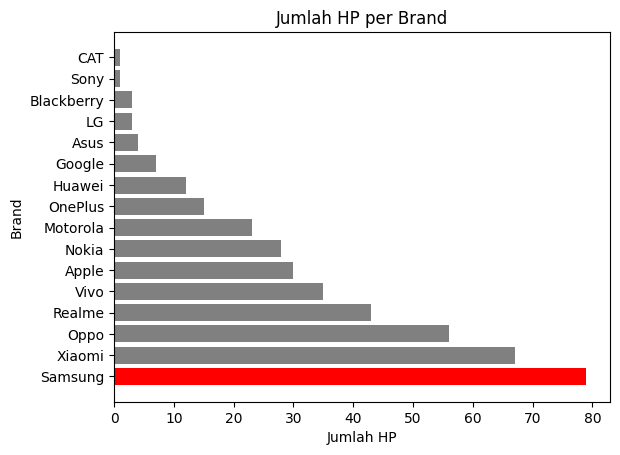

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah HP untuk setiap brand
brand_counts = df['Brand'].value_counts()

# Temukan jumlah HP paling tinggi
max_count = brand_counts.max()

# Buat bar chart vertikal
plt.barh(brand_counts.index, brand_counts, color="gray")

# Set warna untuk bar dengan jumlah HP paling tinggi
for i, count in enumerate(brand_counts):
    if count == max_count:
        plt.barh(i, count, color='red')
plt.xlabel('Jumlah HP')
plt.ylabel('Brand')
plt.title('Jumlah HP per Brand')
plt.show()

Dari hasil visualisasi diatas dapat disimpulkan bahwa brand HP Samsung memiliki jumlah unit yang paling banyak dari brand lainnya.



##**Verify Data Quality**

####Missing Values

In [ ]:
df.isna().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

Dari hasil codingan diatas dapat dilihat bahwa tidak terdapat nilai yang kosong dari masing-masing kolom pada data tersebut.


####Outliers Values

In [ ]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Mengecek outliers untuk setiap kolom numerik
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    outliers = detect_outliers(df[column])
    if not outliers.empty:
        print(f"Outliers dalam kolom '{column}':")
        print(outliers)
    else:
        print(f"Tidak ada outliers dalam kolom '{column}'")

Outliers dalam kolom 'Battery Capacity (mAh)':
0      3095
5      2815
13     2227
25     3110
32     1821
39     2942
45     2227
62     1821
68     2942
74     3110
77     2815
90     3000
208    7000
289    1821
305    2815
308    2942
315    2800
318    2815
326    3110
333    1821
334    7000
338    3174
347    2691
355    2942
369    2227
379    1821
384    2815
388    3110
396    2942
Name: Battery Capacity (mAh), dtype: int64


Dari hasil output diatas dapat disimpulkan bahwa terdapat outlier pada kolom battery capacity. Output diatas baru bisa menampilkan 1 kolom saja yang memiliki outlier dikarenakan kolom-kolom lain masih bertipe data object jadi codingan tersebut belum bisa mendeteksi outlier pada kolom lain.

####Duplicated Values

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
402    False
403    False
404    False
405    False
406     True
Length: 407, dtype: bool

Dari hasil codingan diatas menunjukkan bahwa terdapat 406 baris dalam DataFrame yang bukan duplikat.
Tetapi terdapat 1 baris duplikat dalam DataFrame, yaitu pada baris terakhir.

####Inconsistent Values / Noise (Optional)

In [ ]:
for column in df.columns:
  print(f"Kolom '{column}':")

  unique_values_count = len(df[column].unique())

  print(f"Jumlah Nilai Unik: {unique_values_count}")
  print()


Kolom 'Brand':
Jumlah Nilai Unik: 16

Kolom 'Model':
Jumlah Nilai Unik: 239

Kolom 'Storage ':
Jumlah Nilai Unik: 13

Kolom 'RAM ':
Jumlah Nilai Unik: 20

Kolom 'Screen Size (inches)':
Jumlah Nilai Unik: 41

Kolom 'Camera (MP)':
Jumlah Nilai Unik: 143

Kolom 'Battery Capacity (mAh)':
Jumlah Nilai Unik: 48

Kolom 'Price ($)':
Jumlah Nilai Unik: 89



Pada informasi diatas, dijelaskan tentang jumlah unit dalam setiap kolom dari dataset.


*   Kolom Brand: Terdapat nilai 16 unik dalam kolom ini, yang berarti terdapat variasi merk-merk HP dari masing-masing Brand.
*   Kolom Model: Terdapat nilai 239 unik dalam kolom ini, yang berarti terdapat variasi model-model HP.
*  Kolom Storage: Terdapat nilai 13 unik dalam kolom ini, yang berarti terdapat variasi penyimpanan-penyimpanan pada HP.
*   Kolom RAM: Terdapat nilai 20 unik dalam kolom ini, yang berarti terdapat variasi internal RAM HP.    
*   Kolom Screen Size: Terdapat nilai 41 unik dalam kolom ini, yang berarti terdapat variasi Layar inch HP.
*   Kolom Camera: terdapat nilai 143 unik  dalam kolom ini, yang berarti terdapat variasi kamera HP berdasarkan Megapixelnya.
*   Kolom Battery Capacity: Terdapat nilai 48 unik dalam kolom ini, yang berarti terdapat variasi kapasitas baterai HP.
*   Kolom Price: Terdapat nilai 89 unik dalam kolom ini, yang berarti terdapat variasi Harga HP.







